In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [14]:
economics_df = pd.read_csv('../../../data/rosstat/processed/result_economics_df_v1_0.csv')

<Axes: >

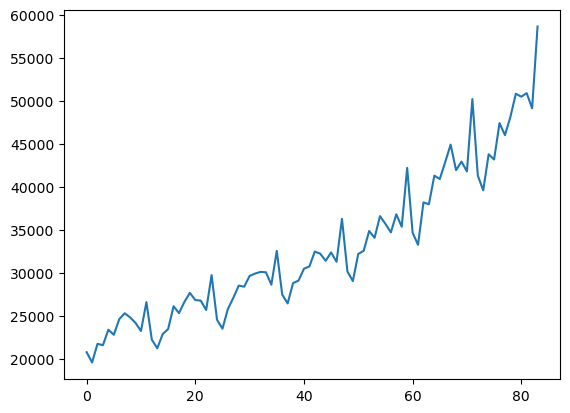

In [ ]:
economics_df[economics_df['code'].eq(1)]['nominal_wage']

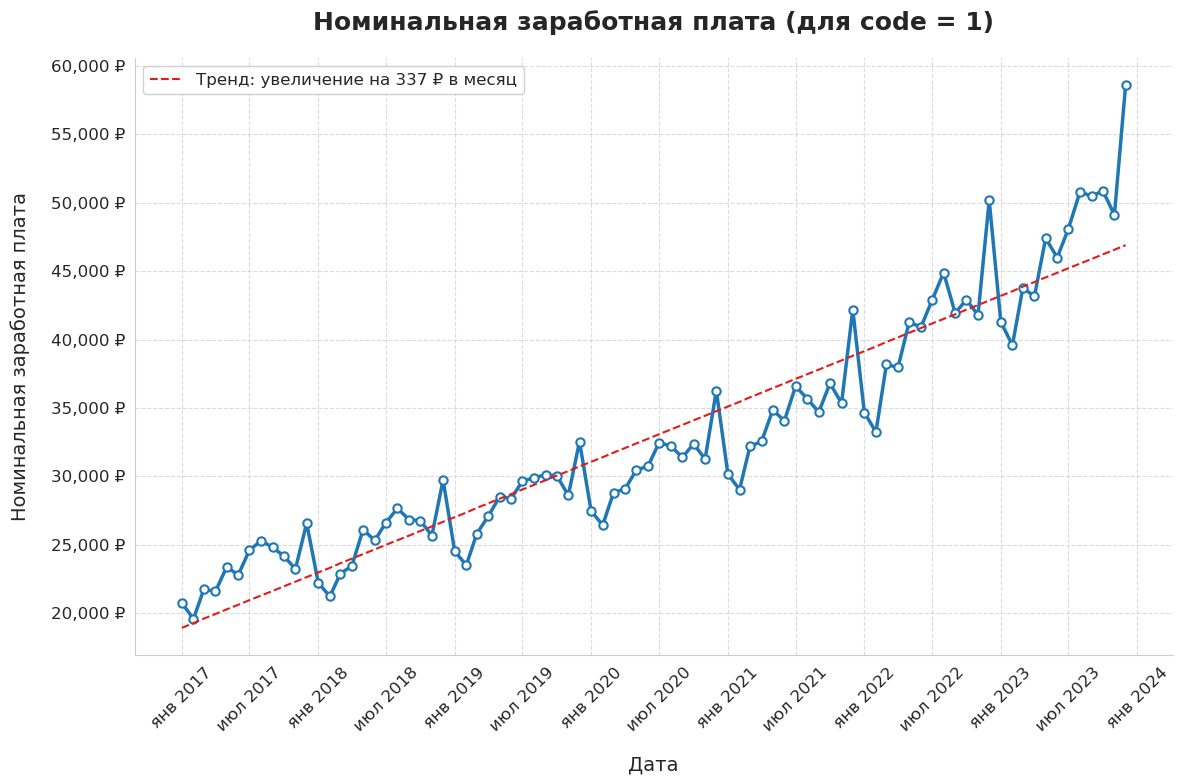

In [53]:
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12

economics_df['date'] = pd.to_datetime(economics_df['date'])

filtered_df = economics_df[economics_df['code'] == 1]

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(filtered_df['date'], filtered_df['nominal_wage'], 
        color='#1f77b4', linewidth=2.5, marker='o', 
        markersize=6, markerfacecolor='white', 
        markeredgecolor='#1f77b4', markeredgewidth=1.5)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation=45)

def currency_formatter(x, pos):
    return f"{x:,.0f} ₽"

ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.title('Номинальная заработная плата (для code = 1)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Дата', fontsize=14, labelpad=15)
plt.ylabel('Номинальная заработная плата', fontsize=14, labelpad=15)

ax.grid(True, linestyle='--', alpha=0.7)

z = np.polyfit(range(len(filtered_df)), filtered_df['nominal_wage'], 1)
p = np.poly1d(z)
plt.plot(filtered_df['date'], p(range(len(filtered_df))), 
         linestyle='--', color='#e41a1c', linewidth=1.5,
         label=f'Тренд: увеличение на {z[0]:.0f} ₽ в месяц')

plt.legend(loc='upper left', frameon=True, framealpha=0.9)

sns.despine(left=False, bottom=False, right=True, top=True)
plt.tight_layout()

plt.show()

In [51]:
120 / 84

1.4285714285714286

In [45]:
z

array([   956.68370579, 103773.49142807])

In [40]:
economics_df[economics_df['nominal_wage'].eq(economics_df['nominal_wage'].max())]

,code,capital_labor_ratio_change,capital_productivity_change,fixed_assets_renewal_comparable_prices,labor_productivity,nominal_wage,high_productivity_jobs,machinery_share_in_total_assets,investment_share_for_modernization,production_index_yoy,production_index_mom,date
417,6,104.5,91.5,5.5,95.6,230784.4,1077.508,19.0,13.9,108.2,99.7,2023-10-01


In [ ]:
economics_df[economics_df['code'].eq(1)].nunique()

code                                       1
capital_labor_ratio_change                 7
capital_productivity_change                7
fixed_assets_renewal_comparable_prices     6
labor_productivity                         7
nominal_wage                              84
high_productivity_jobs                     7
machinery_share_in_total_assets            7
investment_share_for_modernization         7
production_index_yoy                      79
production_index_mom                      74
date                                      84
dtype: int64